In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore, ttest_ind
from statsmodels.stats.weightstats import ztest

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set(style='whitegrid')


In [23]:
df=pd.read_csv("/Users/alexkochu/Desktop/health_Dataset.csv")

In [89]:
print(df.head())        # Shows first 5 rows



  Sex   Age  Weight (kg)  Height (m)   BMI  Abdominal Circumference (cm)  \
0   F  32.0      69.1000        1.71  23.6                          86.2   
1   F  55.0     118.7000        1.69  41.6                          82.5   
2   M  46.0      86.6145        1.83  26.9                         106.7   
3   M  44.0     108.3000        1.80  33.4                          96.6   
4   F  32.0      99.5000        1.86  28.8                         102.7   

  Blood Pressure (mmHg)  Total Cholesterol (mg/dL)  HDL (mg/dL)  \
0                125/79                      248.0         78.0   
1                139/70                      162.0         50.0   
2                104/77                      103.0         73.0   
3                140/83                      134.0         46.0   
4                144/83                      146.0         64.0   

   Fasting Blood Sugar (mg/dL)  ... Family History of CVD CVD Risk Level  \
0                        111.0  ...                     N   INTE

In [91]:
print(df.info())        # Structure of dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1529 non-null   float64
 2   Weight (kg)                   1529 non-null   float64
 3   Height (m)                    1529 non-null   float64
 4   BMI                           1529 non-null   float64
 5   Abdominal Circumference (cm)  1529 non-null   float64
 6   Blood Pressure (mmHg)         1529 non-null   object 
 7   Total Cholesterol (mg/dL)     1529 non-null   float64
 8   HDL (mg/dL)                   1529 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   1529 non-null   float64
 10  Smoking Status                1529 non-null   object 
 11  Diabetes Status               1529 non-null   object 
 12  Physical Activity Level       1529 non-null   object 
 13  Fam

In [39]:
# Check missing values
print(df.isnull().sum())


Sex                              0
Age                             78
Weight (kg)                     81
Height (m)                      67
BMI                             64
Abdominal Circumference (cm)    67
Blood Pressure (mmHg)            0
Total Cholesterol (mg/dL)       73
HDL (mg/dL)                     80
Fasting Blood Sugar (mg/dL)     67
Smoking Status                   0
Diabetes Status                  0
Physical Activity Level          0
Family History of CVD            0
CVD Risk Level                   0
Height (cm)                     74
Waist-to-Height Ratio           79
Systolic BP                     71
Diastolic BP                    82
Blood Pressure Category          0
Estimated LDL (mg/dL)           69
CVD Risk Score                  70
dtype: int64


In [93]:
print(df.describe())  

               Age  Weight (kg)   Height (m)          BMI  \
count  1529.000000  1529.000000  1529.000000  1529.000000   
mean     46.973185    85.954355     1.754150    28.453147   
std      12.101985    20.448650     0.110583     6.889976   
min      25.000000    50.100000     1.502000    15.000000   
25%      37.000000    67.970000     1.670000    22.811000   
50%      46.000000    86.614500     1.755000    28.159000   
75%      55.000000   104.100000     1.840000    33.700000   
max      79.000000   120.000000     2.000000    46.200000   

       Abdominal Circumference (cm)  Total Cholesterol (mg/dL)  HDL (mg/dL)  \
count                   1529.000000                1529.000000  1529.000000   
mean                      91.765624                 198.465664    56.187050   
std                       12.539326                  56.397607    15.640566   
min                       70.000000                 100.000000    30.000000   
25%                       80.900000                 151

In [41]:
# Fill numerical columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [43]:
# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [45]:
# Confirm no missing values remain
print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
Sex                             0
Age                             0
Weight (kg)                     0
Height (m)                      0
BMI                             0
Abdominal Circumference (cm)    0
Blood Pressure (mmHg)           0
Total Cholesterol (mg/dL)       0
HDL (mg/dL)                     0
Fasting Blood Sugar (mg/dL)     0
Smoking Status                  0
Diabetes Status                 0
Physical Activity Level         0
Family History of CVD           0
CVD Risk Level                  0
Height (cm)                     0
Waist-to-Height Ratio           0
Systolic BP                     0
Diastolic BP                    0
Blood Pressure Category         0
Estimated LDL (mg/dL)           0
CVD Risk Score                  0
dtype: int64


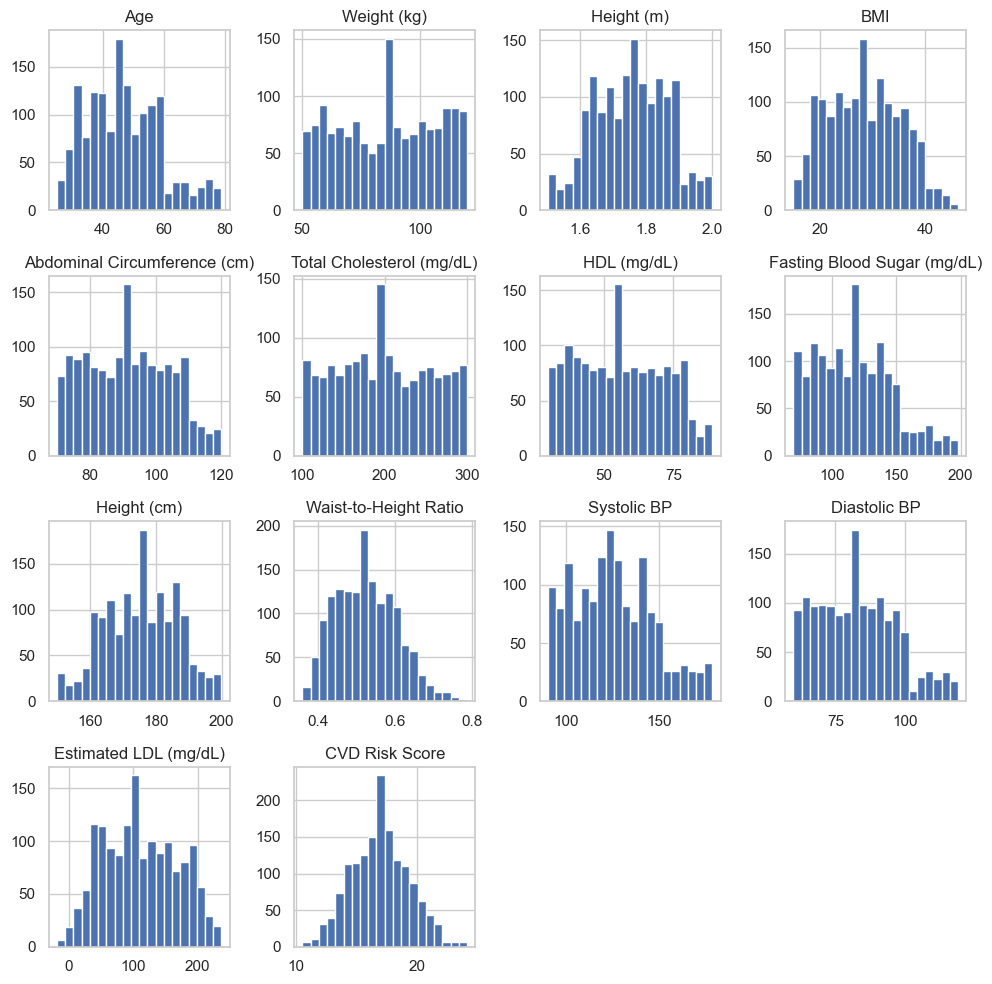

In [47]:
# Histograms
df[num_cols].hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()

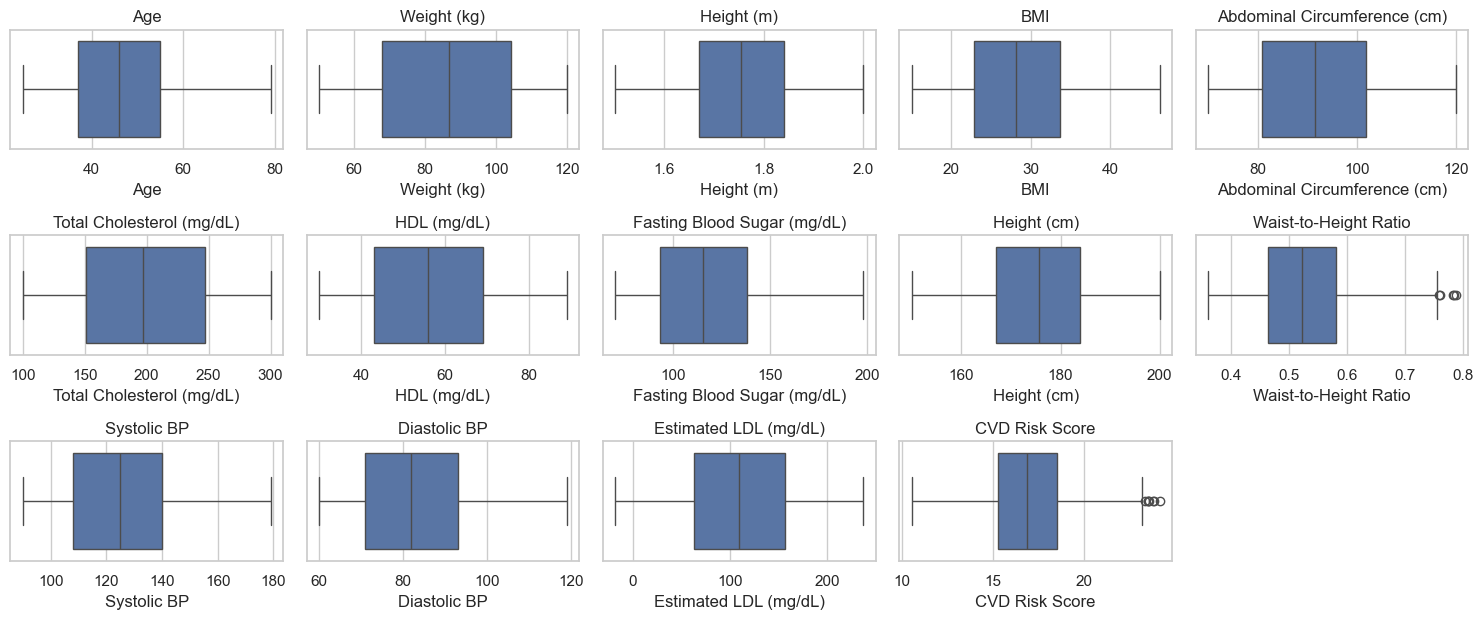

In [49]:
# Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

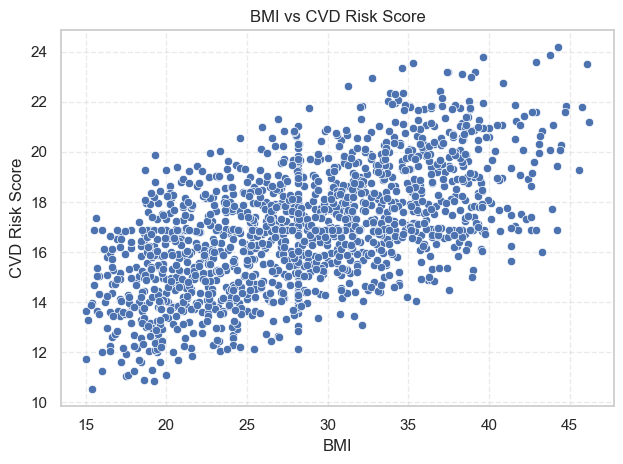

In [87]:
sns.scatterplot(x='BMI', y='CVD Risk Score', data=df)
plt.title("BMI vs CVD Risk Score")
plt.xlabel("BMI")
plt.ylabel("CVD Risk Score")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


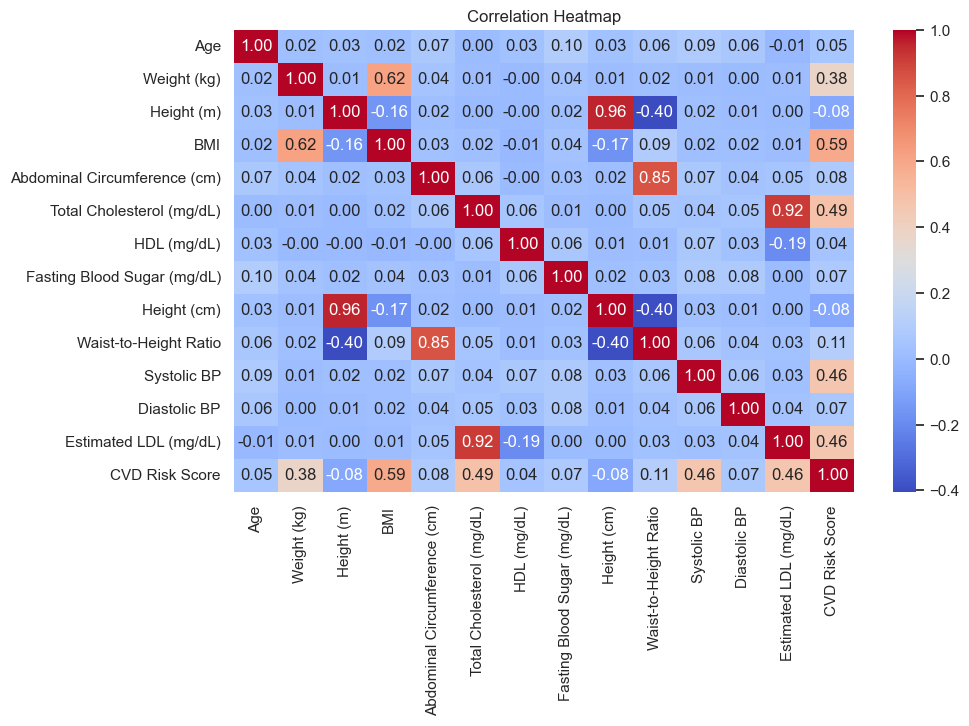

In [53]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [55]:
# Z-Score for Outlier Detection
z_scores = df[num_cols].apply(zscore)
outliers = (np.abs(z_scores) > 3)
print("Outliers per column:\n", outliers.sum())


Outliers per column:
 Age                             0
Weight (kg)                     0
Height (m)                      0
BMI                             0
Abdominal Circumference (cm)    0
Total Cholesterol (mg/dL)       0
HDL (mg/dL)                     0
Fasting Blood Sugar (mg/dL)     0
Height (cm)                     0
Waist-to-Height Ratio           3
Systolic BP                     0
Diastolic BP                    0
Estimated LDL (mg/dL)           0
CVD Risk Score                  1
dtype: int64


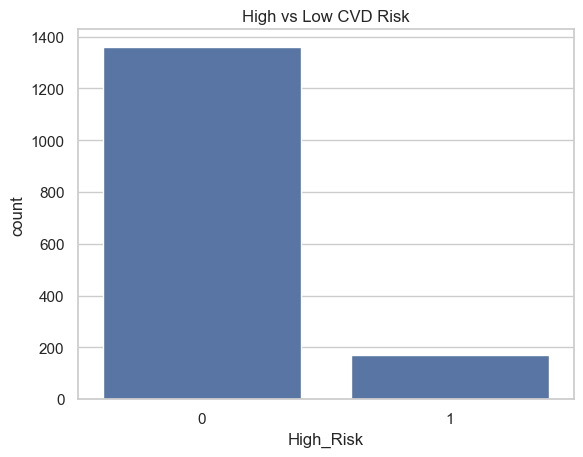

In [57]:
#Create High Risk Target Variable
# Assume threshold for high risk is 20
df['High_Risk'] = np.where(df['CVD Risk Score'] >= 20, 1, 0)

# Count plot for High_Risk
sns.countplot(x='High_Risk', data=df)
plt.title("High vs Low CVD Risk")
plt.show()


In [59]:
#Hypothesis Testing: Z-Test & T-Test
high_risk = df[df['High_Risk'] == 1]
low_risk = df[df['High_Risk'] == 0]

features_to_test = ['BMI', 'Age', 'Systolic BP', 'Diastolic BP']

for feature in features_to_test:
    if feature in df.columns:
        z_stat, p_val = ztest(high_risk[feature], low_risk[feature])
        t_stat, t_pval = ttest_ind(high_risk[feature], low_risk[feature])
        print(f"\nFeature: {feature}")
        print(f"Z-Test: Z = {z_stat:.2f}, p = {p_val:.4f}")
        print(f"T-Test: T = {t_stat:.2f}, p = {t_pval:.4f}")



Feature: BMI
Z-Test: Z = 16.32, p = 0.0000
T-Test: T = 16.32, p = 0.0000

Feature: Age
Z-Test: Z = 0.43, p = 0.6686
T-Test: T = 0.43, p = 0.6687

Feature: Systolic BP
Z-Test: Z = 13.08, p = 0.0000
T-Test: T = 13.08, p = 0.0000

Feature: Diastolic BP
Z-Test: Z = 0.99, p = 0.3215
T-Test: T = 0.99, p = 0.3216


In [61]:
#Logistic Regression (Classification)
# Prepare data for ML
X = df.select_dtypes(include='number').drop(['CVD Risk Score', 'High_Risk'], axis=1)
y = df['High_Risk']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9281045751633987
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       401
           1       0.80      0.57      0.67        58

    accuracy                           0.93       459
   macro avg       0.87      0.77      0.81       459
weighted avg       0.92      0.93      0.92       459

Confusion Matrix:
 [[393   8]
 [ 25  33]]


/var/folders/9c/yc25ycx52hj55s68cdymw5140000gn/T/ipykernel_20625/1199824458.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=metrics, palette=sns.color_palette("rocket", n_colors=4))  # ✅ FIXED


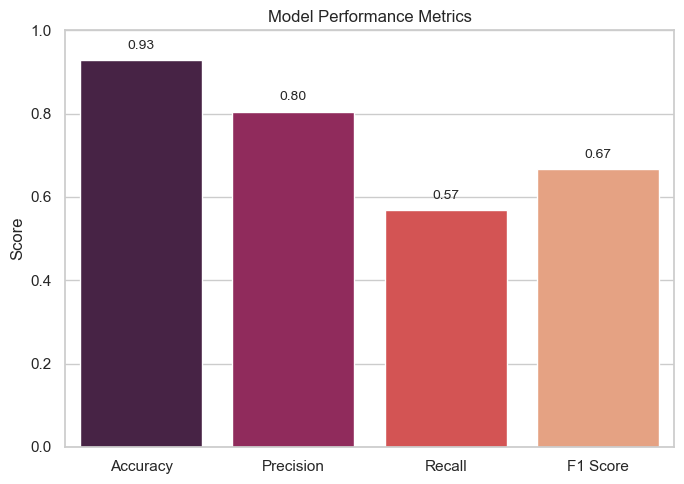

In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = [acc, prec, rec, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(7, 5))
sns.barplot(x=labels, y=metrics, palette="rocket")
plt.ylim(0, 1)
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.show()


In [77]:
# A/B-like Test: Compare Cholesterol in Smokers vs Non-Smokers (if columns exist)
if 'Smoker' in df.columns and 'Cholesterol' in df.columns:
    group_A = df[df['Smoker'] == 'Yes']['Cholesterol']
    group_B = df[df['Smoker'] == 'No']['Cholesterol']
    z_stat, p_val = ztest(group_A, group_B)
    print(f"\nA/B Test - Cholesterol in Smokers vs Non-Smokers: Z = {z_stat:.2f}, p = {p_val:.4f}")
else:
    print("Columns 'Smoker' or 'Cholesterol' not found in the dataset.")



Columns 'Smoker' or 'Cholesterol' not found in the dataset.
